# ADALINE with Stochastic Gradient Descent

## Introduction to ADALINE

ADALINE (Adaptive Linear Neuron) is a type of single-layer artificial neural network and a precursor to more complex neural network models. It was introduced by Bernard Widrow and Ted Hoff in 1960. The key feature of ADALINE is its use of the least mean squares (LMS) learning rule to update the weights, which minimizes the mean squared error between the actual output and the desired output.

### Key Characteristics of ADALINE:
- **Linear Activation Function**: Unlike modern neural networks that use non-linear activation functions, ADALINE uses a linear activation function.
- **Weight Update Rule**: The weights are updated using the LMS algorithm, which adjusts the weights to minimize the error.
- **Single Layer**: ADALINE consists of a single layer of neurons, making it a simple and efficient model for linear classification tasks.

### Applications:
ADALINE is primarily used for linear classification problems and has historical significance in the development of neural network algorithms. It serves as a foundational concept for understanding more complex neural network architectures.

In this notebook, we will implement an ADALINE model using stochastic gradient descent and apply it to a toy dataset to demonstrate its functionality.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import torch
%matplotlib inline
warnings.filterwarnings('ignore')

<br>
<br>

## Load & Prepare a Toy Dataset

In [2]:
import os

import urllib.request

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
output_path = "./datasets/iris.data"

os.makedirs('./datasets', exist_ok=True)
urllib.request.urlretrieve(url, output_path)
print("Dataset downloaded successfully.")

df = pd.read_csv('./datasets/iris.data', index_col=None, header=None)
print(df.shape)
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']
df = df.iloc[50:150]
df['y'] = df['y'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)
df.tail()

Dataset downloaded successfully.
(150, 5)


,x1,x2,x3,x4,y
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


### Prepare train and test dataset

In [3]:
# Assign features and target
X = torch.tensor(df[['x2', 'x3']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.int)

# Shuffling & train/test split

torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X, y = X[shuffle_idx], y[shuffle_idx]

percent70 = int(shuffle_idx.size(0)*0.7)

X_train, X_test = X[shuffle_idx[:percent70]], X[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

# Normalize (mean zero, unit variance)

mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

In [ ]:
# Plot the train data and see if it is linearly separable 
plt.figure(figsize=(8, 6))
plt.title('Iris train dataset')
# write the plotting code here

In [ ]:
# similarly, plot the test data
plt.figure(figsize=(8, 6))
plt.title('Iris test dataset')
# write the plotting code here

<br>
<br>

## Implement ADALINE Model

In [ ]:
def loss(yhat, y):
    return torch.mean((yhat - y)**2)


class Adaline():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, 
                                   dtype=torch.float)
        self.bias = torch.zeros(1, dtype=torch.float)

    def forward(self, x):
        netinputs = torch.add(torch.mm(x, self.weights), self.bias)
        activations = netinputs
        return activations.view(-1)
        
    def backward(self, x, yhat, y):  
        # Loss function =  torch.mean((yhat - y)**2)
        # Compute the gradient of the loss w.r.t. weights and bias
        
        # Gradient of the loss w.r.t. weights
        grad_loss_weights = # write your code here
        
        # Gradient of the loss w.r.t. bias
        grad_loss_bias =  # write your code here
        
        
        return (-1)*grad_loss_weights, (-1)*grad_loss_bias


<br>
<br>

## Define Training and Evaluation Functions

In [ ]:
####################################################
##### Training and evaluation wrappers
###################################################

def train(model, x, y, num_epochs,
          learning_rate=0.01, seed=123, batch_size=10):
    cost = []
    
    torch.manual_seed(seed)
    for e in range(num_epochs):
        
        #### Shuffle epoch
        shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)
        batches = torch.split(shuffle_idx, batch_size)
        print(len(batches), batch_size, y.shape)
        for batch_idx in batches:

            #### Compute outputs ####
            yhat = model.forward(x[batch_idx])
            print(yhat.shape)
            #### Compute gradients ####
            negative_grad_w, negative_grad_b = \
                model.backward(x[batch_idx], yhat, y[batch_idx])

            #### Update weights ####
            model.weights += learning_rate * negative_grad_w #+ 1*learning_rate*torch.randn_like(model.weights)
            model.bias += learning_rate * negative_grad_b #+ 1*learning_rate*torch.randn_like(model.bias)
            
            #### Logging ####
            batch_loss = loss(yhat, y[batch_idx])
            print('batch MSE: %.3f' % batch_loss)

        #### Logging ####
        yhat = model.forward(x)
        curr_loss = loss(yhat, y)
        print('Epoch: %03d' % (e+1), end="")
        print(' | MSE: %.5f' % curr_loss)
        cost.append(curr_loss)

    return cost

<br>
<br>

## Train Linear Regression Model

In [8]:
model = Adaline(num_features=X_train.size(1))
cost = train(model, 
             X_train, y_train.float(),
             num_epochs=200,
             learning_rate=0.001,
             seed=123,
             batch_size=10)

7 10 torch.Size([70])
torch.Size([10])
    batch MSE: 0.500
torch.Size([10])
    batch MSE: 0.498
torch.Size([10])
    batch MSE: 0.496
torch.Size([10])
    batch MSE: 0.594
torch.Size([10])
    batch MSE: 0.493
torch.Size([10])
    batch MSE: 0.394
torch.Size([10])
    batch MSE: 0.393
Epoch: 001 | MSE: 0.47472
7 10 torch.Size([70])
torch.Size([10])
    batch MSE: 0.681
torch.Size([10])
    batch MSE: 0.294
torch.Size([10])
    batch MSE: 0.577
torch.Size([10])
    batch MSE: 0.291
torch.Size([10])
    batch MSE: 0.294
torch.Size([10])
    batch MSE: 0.479
torch.Size([10])
    batch MSE: 0.676
Epoch: 002 | MSE: 0.46406
7 10 torch.Size([70])
torch.Size([10])
    batch MSE: 0.472
torch.Size([10])
    batch MSE: 0.565
torch.Size([10])
    batch MSE: 0.287
torch.Size([10])
    batch MSE: 0.478
torch.Size([10])
    batch MSE: 0.469
torch.Size([10])
    batch MSE: 0.386
torch.Size([10])
    batch MSE: 0.561
Epoch: 003 | MSE: 0.45371
7 10 torch.Size([70])
torch.Size([10])
    batch MSE: 0.37

<br>
<br>

## Evaluate ADALINE Model

### Plot Loss (MSE)

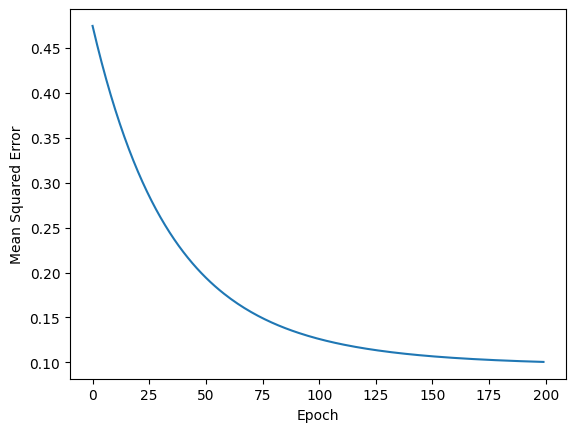

In [9]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

<br>
<br>

<br>
<br>

## Evaluate on Evaluation Metric (Prediction Accuracy)

In [13]:
train_pred = model.forward(X_train)
train_acc = torch.mean(((train_pred > 0.5).int() == y_train).float())

test_pred = model.forward(X_test)
test_acc = torch.mean(((test_pred > 0.5).int() == y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Test Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 92.86
Test Accuracy: 93.33


<br>
<br>

## Decision Boundary

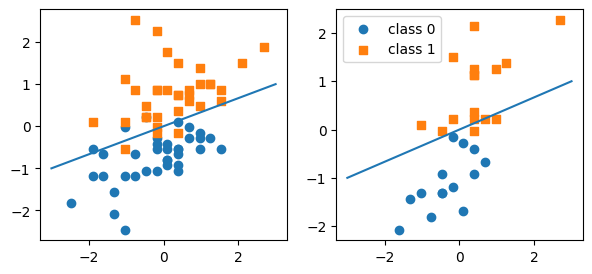

In [ ]:
# plot the 2D decision boundary and the data points
plt.figure(figsize=(8, 6))
plt.title('Iris data classification')
# write the plotting code here
plt.show()

# Try with Cancer dataset

Breast_cancer dataset downloaded successfully.


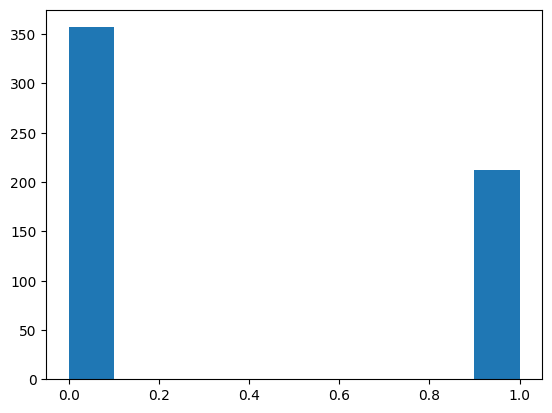

In [16]:
import urllib.request

# URLs for the datasets
datasets = {
    "breast_cancer": "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
}

# Download the datasets
for name, url in datasets.items():
    output_path = f"./datasets/{name}.data"
    urllib.request.urlretrieve(url, output_path)
    print(f"{name.capitalize()} dataset downloaded successfully.")


df = pd.read_csv('./datasets/breast_cancer.data', index_col=None, header=None)
# Swap column 1 with the last column
cols = list(df.columns)
cols[1], cols[-1] = cols[-1], cols[1]
df = df[cols]

df.tail(100)

# Rename columns as x1, x2, ..., y
df.columns = [f'x{i}' for i in range(1, df.shape[1])] + ['y']
df['y'] = df['y'].apply(lambda x: 0 if x == 'B' else 1)
df.tail()
plt.hist(df.loc[:, 'y']);